<h1>Module Import</h1>

In [2]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<h1>Input and Output</h1>

In [4]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
x = tf.placeholder("float", shape = [None,28,28,1])
y_ = tf.placeholder("float", shape = [None,10])

<h1>Network Architecture</h1>

In [5]:
W_conv1 = tf.Variable(tf.truncated_normal([5,5,1,32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(.1, shape=[32]))

In [6]:
print(x)
print(W_conv1)
h_conv1 = tf.nn.conv2d(input=x, filter=W_conv1, strides=[1,1,1,1], padding="SAME") + b_conv1
h_conv1 = tf.nn.relu(h_conv1)
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")

Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float32)
<tf.Variable 'Variable:0' shape=(5, 5, 1, 32) dtype=float32_ref>


In [7]:
def conv2d(x, W):
  return tf.nn.conv2d(input=x, filter=W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [8]:
#Second Conv and Pool Layers
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(.1, shape = [64]))
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

#First Fully Connected Layer
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(.1, shape = [1024]))
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

#Dropout Layer
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#Second Fully Connected Layer
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(.1, shape = [10]))

#Final Layer
y = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

<h1>Loss Function</h1>

In [9]:
crossEntropyLoss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [10]:
trainStep = tf.train.AdamOptimizer().minimize(crossEntropyLoss)

In [11]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [12]:
sess.run(tf.global_variables_initializer())

In [13]:
tf.summary.scalar('Cross Enropy Loss', crossEntropyLoss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
writer = tf.summary.FileWriter(logdir, sess.graph)

INFO:tensorflow:Summary name Cross Enropy Loss is illegal; using Cross_Enropy_Loss instead.


(1, 784)
Tensor("Reshape_1:0", shape=(1, 28, 28, 1), dtype=float32)


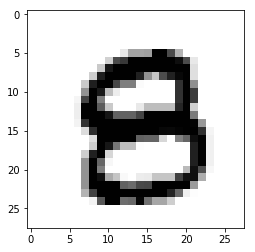

In [14]:
b = mnist.train.next_batch(1)
print(b[0].shape) #b[0] contains the image
image = tf.reshape(b[0], [-1,28,28,1])
print(image)
my_img = image.eval() #here is your image Tensor
my_i = my_img.squeeze()
plt.imshow(my_i, cmap='gray_r')
plt.show()

In [15]:
batchSize = 50
for i in range(1000):
    batch = mnist.train.next_batch(batchSize)
    trainingInputs = batch[0].reshape([batchSize,28,28,1])
    trainingLabels = batch[1]
    if i%10 == 0:
        summary = sess.run(merged, {x: trainingInputs, y_: trainingLabels, keep_prob: 1.0})
        writer.add_summary(summary, i)
    if i%100 == 0:
        trainAccuracy = accuracy.eval(session=sess, feed_dict={x:trainingInputs, y_: trainingLabels, keep_prob: 1.0})
        print("step {}".format(i), "training accuracy {}".format(trainAccuracy))
    trainStep.run(session=sess, feed_dict={x: trainingInputs, y_: trainingLabels, keep_prob: 0.5})

step 0 training accuracy 0.10000000149011612
step 100 training accuracy 0.8600000143051147
step 200 training accuracy 0.8999999761581421
step 300 training accuracy 1.0
step 400 training accuracy 0.9599999785423279
step 500 training accuracy 0.9800000190734863
step 600 training accuracy 0.9800000190734863
step 700 training accuracy 0.9800000190734863
step 800 training accuracy 0.9800000190734863
step 900 training accuracy 1.0


In [16]:
testInputs = mnist.test.images.reshape([-1, 28, 28, 1])
testLabels = mnist.test.labels
acc = accuracy.eval(feed_dict = {x: testInputs, y_: testLabels, keep_prob: 1.0})
print("testing accuracy: {}".format(acc))

testing accuracy: 0.9811000227928162
